In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colormaps, cm, colors, ticker
import h5py
from findiff import FinDiff
from numpy import log10 as log

In [3]:
f = h5py.File("out_M6_Re73.0.h5")
bk = f["Bk"][:]
uk = f["Uk"][:]
uk[uk==0.0] = np.nan
bk[bk==0.0] = np.nan

In [9]:
ts = f["sim_time"][:]/(2*np.pi)
k = np.arange(1, len(uk[0])+1)
kk, tt = np.meshgrid(k, ts)

In [10]:
print(ts)

[0.09549297 0.19098593 0.2864789  0.38197186 0.47746483 0.5729578
 0.66845076 0.76394373 0.85943669 0.95492966 1.05042262 1.14591559
 1.24140856 1.33690152 1.43239449 1.52788745 1.62338042 1.71887339
 1.81436635 1.90985932 2.00535228 2.10084525 2.19633821 2.29183118
 2.38732415 2.48281711 2.57831008 2.67380304 2.76929601 2.86478898
 2.96028194 3.05577491 3.15126787 3.24676084 3.3422538  3.43774677
 3.53323974 3.6287327  3.72422567 3.81971863 3.9152116  4.01070457
 4.10619753 4.2016905  4.29718346 4.39267643 4.4881694  4.58366236
 4.67915533 4.77464829 4.87014126 4.96563422 5.06112719 5.15662016
 5.25211312 5.34760609 5.44309905 5.53859202 5.63408499 5.72957795
 5.82507092 5.92056388 6.01605685 6.11154981 6.20704278 6.30253575
 6.39802871 6.49352168 6.58901464 6.68450761 6.78000058 6.87549354
 6.97098651 7.06647947 7.16197244 7.2574654  7.35295837 7.44845134
 7.5439443  7.63943727 7.73493023 7.8304232  7.92591617]


In [11]:
d_dt = FinDiff(0, ts[1] - ts[0])
g_u = d_dt(np.log(uk))
g_b = d_dt(np.log(bk))
# Mask suspicious funny stuff?
g_u[(g_u > 30) | (g_u < -5)] = np.nan
g_b[(g_b > 30) | (g_b < -5)] = np.nan

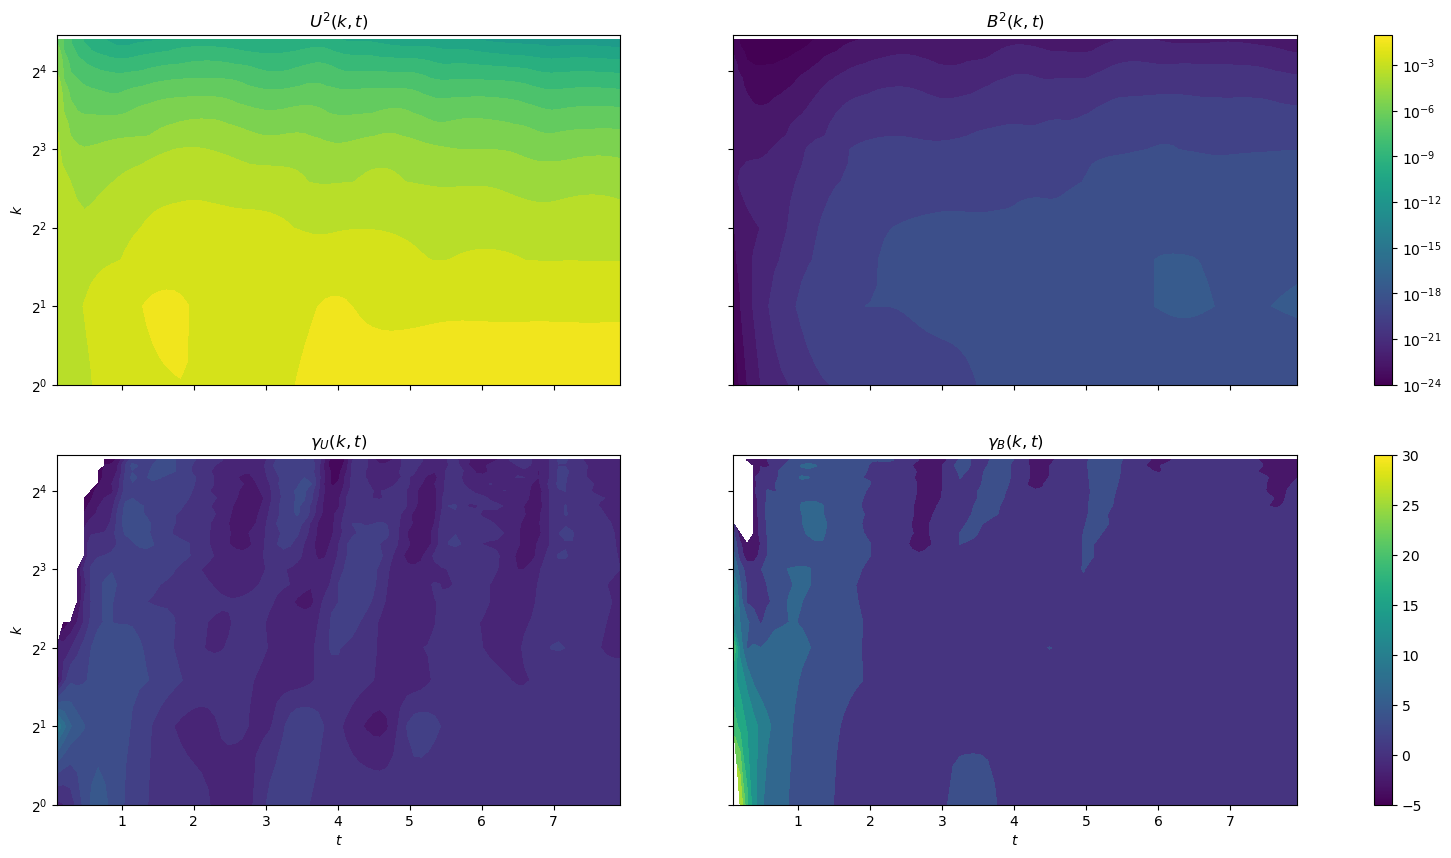

In [12]:
fig, axs = plt.subplots(2,2, sharex=True, sharey=True, figsize=(20, 10))
datas = np.array([[uk, bk], [g_u, g_b]])
titles = np.array([["$U^2(k, t)$", "$B^2(k, t)$"], ["$\gamma_U(k, t)$", "$\gamma_B(k, t)$"]])

for i in (0, 1):
    if not i:
        cmap = colormaps["viridis"]
        normalizer = colors.LogNorm(1e-24, 1e-1)
        im = cm.ScalarMappable(norm=normalizer, cmap=cmap)
        tk=ticker.LogLocator(numticks=30)
    else:
        cmap = colormaps["viridis"]
        normalizer = colors.Normalize(-5, 30)
        im = cm.ScalarMappable(norm=normalizer, cmap=cmap)
        tk = ticker.LinearLocator()
    for j in (0, 1):
        data = datas[i, j]
        ax = axs[i, j]
        ax.contourf(tt, kk, data, cmap=cmap, norm=normalizer, locator=tk)
        ax.set_yscale("log", base=2)
        ax.set_title(titles[i, j])
        if i:
            ax.set_xlabel("$t$")
        if not j:
            ax.set_ylabel("$k$")
    fig.colorbar(im, ax=axs[i].ravel().tolist())
# plt.savefig("gamma_spectrum.pdf")

In [17]:
b_bar = f["B_mean"][:]

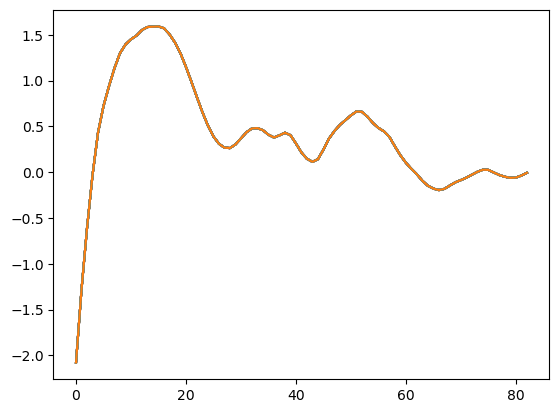

In [23]:
plt.plot(d_dt(np.log(b_bar)))

In [25]:
img = h5py.File("img_M6_Re73.0_w.h5")
img["UB0/3D"].keys()
plt.imshow(img["UB0/3D/

<KeysViewHDF5 ['100', '1000', '1020', '1040', '1060', '1080', '1100', '1120', '1140', '1160', '1180', '120', '1200', '1220', '1240', '1260', '1280', '1300', '1320', '1340', '1360', '1380', '140', '1400', '1420', '1440', '1460', '1480', '1500', '1520', '1540', '1560', '1580', '160', '1600', '1620', '1640', '1660', '180', '20', '200', '220', '240', '260', '280', '300', '320', '340', '360', '380', '40', '400', '420', '440', '460', '480', '500', '520', '540', '560', '580', '60', '600', '620', '640', '660', '680', '700', '720', '740', '760', '780', '80', '800', '820', '840', '860', '880', '900', '920', '940', '960', '980']>

In [26]:
20*20

400

In [ ]:
from tqdm import tqdm
for (i, t) in tqdm(enumerate(ts[:])):
    if i % 10 == 0:
        fig, ax = plt.subplots()
        ax.plot(k, uk[i], label="$U^2(k)$")
        ax.plot(k, bk[i], label="$B^2(k)$")
        ax.set_yscale("log")
        ax.set_xscale("log", base=2)
        ax.set_xlabel("$k$")
        ax.set_ylabel("$E(k)$")
        fig.legend()
        fig.suptitle(f"Energy spectrum, t={t:2.3f}")
        plt.savefig(f"frames/Ek{i:05}.jpg")
        plt.close()